In [25]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('HepCData.csv')

In [4]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [5]:
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                1385 non-null int64
Gender                             1385 non-null int64
BMI                                1385 non-null int64
Fever                              1385 non-null int64
Nausea/Vomting                     1385 non-null int64
Headache                           1385 non-null int64
Diarrhea                           1385 non-null int64
Fatigue & generalized bone ache    1385 non-null int64
Jaundice                           1385 non-null int64
Epigastric pain                    1385 non-null int64
WBC                                1385 non-null int64
RBC                                1385 non-null int64
HGB                                1385 non-null int64
Plat                               1385 non-null int64
AST 1                              1385 non-null int64
ALT 1                              1385 non-null int64
ALT4         

In [17]:
map_dummies = {'Gender': {1: '0', 2: '1'},
              'Fever': {1: '0', 2: '1'},
              'Nausea/Vomting': {1: '0', 2: '1'},
              'Headache': {1: '0', 2: '1'},
              'Diarrhea': {1: '0', 2: '1'},
              'Fatigue & generalized bone ache': {1: '0', 2: '1'},
              'Jaundice': {1: '0', 2: '1'},
              'Epigastric pain': {1: '0', 2: '1'}}

In [18]:
data.replace(map_dummies, inplace=True)
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,0,35,1,0,0,0,1,1,1,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,0,29,0,1,1,0,1,1,0,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,0,33,1,1,1,1,0,0,0,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,1,33,0,1,0,1,0,1,0,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,0,32,0,0,1,0,1,1,1,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [23]:
#create new column for transplant candidates
data['Transplant'] = np.where(data['Baselinehistological staging']==4, '1', '0')

In [24]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Transplant
0,56,0,35,1,0,0,0,1,1,1,...,5,5,655330,634536,288194,5,5,13,2,0
1,46,0,29,0,1,1,0,1,1,0,...,123,44,40620,538635,637056,336804,31085,4,2,0
2,57,0,33,1,1,1,1,0,0,0,...,5,5,571148,661346,5,735945,558829,4,4,1
3,49,1,33,0,1,0,1,0,1,0,...,77,33,1041941,449939,585688,744463,582301,10,3,0
4,59,0,32,0,0,1,0,1,1,1,...,90,30,660410,738756,3731527,338946,242861,11,1,0


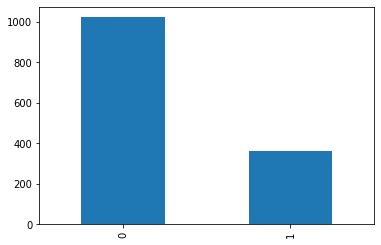

In [27]:
data['Transplant'].value_counts().plot(kind='bar')

In [28]:
data['Transplant'].value_counts()

0    1023
1     362
Name: Transplant, dtype: int64

In [37]:
#df[df.data == 0] = np.nan
#df.fillna(df.median())

data[data == 5] = np.nan
df_edit = data.fillna(data.median())

In [38]:
df_edit.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging,Transplant
0,56,0,35,1,0,0,0,1,1,1,...,84.0,34.0,655330,634536.0,288194.0,386384.0,387088.0,13.0,2,0
1,46,0,29,0,1,1,0,1,1,0,...,123.0,44.0,40620,538635.0,637056.0,336804.0,31085.0,4.0,2,0
2,57,0,33,1,1,1,1,0,0,0,...,84.0,34.0,571148,661346.0,406373.0,735945.0,558829.0,4.0,4,1
3,49,1,33,0,1,0,1,0,1,0,...,77.0,33.0,1041941,449939.0,585688.0,744463.0,582301.0,10.0,3,0
4,59,0,32,0,0,1,0,1,1,1,...,90.0,30.0,660410,738756.0,3731527.0,338946.0,242861.0,11.0,1,0


In [39]:
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 30 columns):
Age                                1385 non-null int64
Gender                             1385 non-null object
BMI                                1385 non-null int64
Fever                              1385 non-null object
Nausea/Vomting                     1385 non-null object
Headache                           1385 non-null object
Diarrhea                           1385 non-null object
Fatigue & generalized bone ache    1385 non-null object
Jaundice                           1385 non-null object
Epigastric pain                    1385 non-null object
WBC                                1385 non-null int64
RBC                                1385 non-null int64
HGB                                1385 non-null int64
Plat                               1385 non-null int64
AST 1                              1385 non-null int64
ALT 1                              1385 non-null int64
ALT4 

In [47]:
df_edit['ALT 36'] = df_edit['ALT 36'].astype('int64')
df_edit['ALT 48'] = df_edit['ALT 48'].astype('int64')
df_edit['ALT after 24 w'] = df_edit['ALT after 24 w'].astype('int64')
df_edit['RNA 4'] = df_edit['RNA 4'].astype('int64')
df_edit['RNA 12'] = df_edit['RNA 12'].astype('int64')
df_edit['RNA EOT'] = df_edit['RNA EOT'].astype('int64')
df_edit['RNA EF'] = df_edit['RNA EF'].astype('int64')
df_edit['RNA 4'] = df_edit['RNA 4'].astype('int64')
df_edit['Baseline histological Grading'] = df_edit['Baseline histological Grading'].astype('int64') #re-replace with non-median values
df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 30 columns):
Age                                1385 non-null int64
Gender                             1385 non-null object
BMI                                1385 non-null int64
Fever                              1385 non-null object
Nausea/Vomting                     1385 non-null object
Headache                           1385 non-null object
Diarrhea                           1385 non-null object
Fatigue & generalized bone ache    1385 non-null object
Jaundice                           1385 non-null object
Epigastric pain                    1385 non-null object
WBC                                1385 non-null int64
RBC                                1385 non-null int64
HGB                                1385 non-null int64
Plat                               1385 non-null int64
AST 1                              1385 non-null int64
ALT 1                              1385 non-null int64
ALT4 

In [49]:
df_edit.to_csv('HepCDF.csv')